In [1]:
# !wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv
# !curl -O https://lazyprogrammer.me/course_files/sp500_close.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [4]:
df.isna().sum()


Passengers    0
dtype: int64

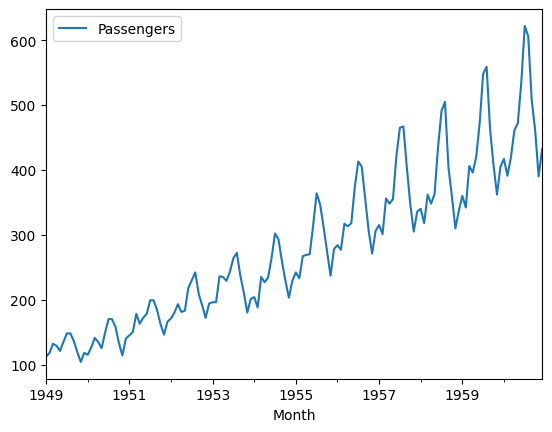

In [5]:
df.plot();

In [6]:
alpha = 0.4# we choose this parameter randomly this is a parameter that can be optimized

In [7]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [8]:
df['EWMA'].head()

Month
1949-01-01    112.0000
1949-02-01    114.4000
1949-03-01    121.4400
1949-04-01    124.4640
1949-05-01    123.0784
Name: EWMA, dtype: float64

In [9]:
type(df['Passengers'].ewm(alpha=alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

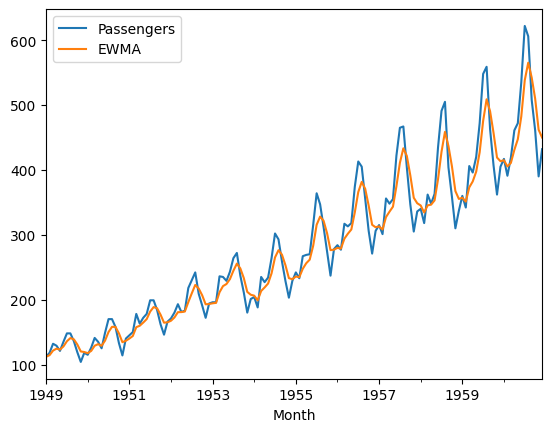

In [10]:
df.plot();

In [11]:
#the process made manually
manual_ewma = []
for x in df['Passengers'].to_numpy():
  if len(manual_ewma) > 0:
    xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df['Manual'] = manual_ewma

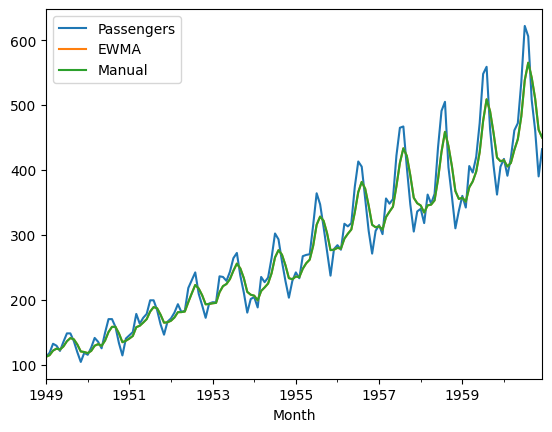

In [12]:
df.plot();

In [13]:
df.head()

Passengers      EWMA    Manual
Month                                     
1949-01-01         112  112.0000  112.0000
1949-02-01         118  114.4000  114.4000
1949-03-01         132  121.4400  121.4400
1949-04-01         129  124.4640  124.4640
1949-05-01         121  123.0784  123.0784

In [14]:
df.drop('Manual', axis=1, inplace=True)

In [15]:
!pip install -U statsmodels

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing#Exponential Weighted Moving Average (EWMA)

In [17]:
ses = SimpleExpSmoothing(df['Passengers'])

C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
# link to offset aliases docs
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [19]:
df.index.freq = 'MS'

# Par√°metro `initialization_method` en `SimpleExpSmoothing` de `statsmodels`

El par√°metro `initialization_method` en el m√©todo `SimpleExpSmoothing` de `statsmodels` define c√≥mo se inicializa el primer valor suavizado \( F_1 \), que es crucial para los c√°lculos posteriores de la serie suavizada. La elecci√≥n de este m√©todo de inicializaci√≥n afecta el pron√≥stico, ya que determina el punto de partida de la serie suavizada.

## Opciones de `initialization_method`

### 'estimated' (predeterminado en versiones m√°s recientes de `statsmodels`):
- El valor inicial \( F_1 \) se estima como un par√°metro durante el ajuste del modelo.
- Es la opci√≥n recomendada para mejorar la precisi√≥n del modelo, ya que optimiza el valor inicial en funci√≥n de los datos.

### 'heuristic':
- El primer valor suavizado se establece utilizando una heur√≠stica (generalmente el primer valor de la serie).
- Es un m√©todo r√°pido, pero puede ser menos preciso en algunos casos.

### 'legacy-heuristic':
- Este es el m√©todo heredado de versiones anteriores de `statsmodels`.
- Establece el primer valor suavizado como el promedio de los primeros datos en la serie, y se utiliza principalmente para compatibilidad con versiones antiguas.

### 'known':
- Permite al usuario definir expl√≠citamente el valor inicial de la serie suavizada.


In [20]:
ses = SimpleExpSmoothing(
    df['Passengers'],
    initialization_method='legacy-heuristic')

1. smoothing_level
Este par√°metro controla el nivel de suavizaci√≥n exponencial, representado por el valor 
ùõº
Œ±.
ùõº
Œ± es un valor entre 0 y 1 que determina cu√°nto peso se asigna a los datos recientes en comparaci√≥n con los datos anteriores:
Un valor de 
ùõº
Œ± cercano a 1 otorga m√°s peso a las observaciones recientes, lo que hace que la serie suavizada sea m√°s reactiva a los cambios recientes.
Un valor de 
ùõº
Œ± cercano a 0 otorga m√°s peso a los valores suavizados anteriores, lo que da lugar a una serie m√°s estable y menos sensible a las variaciones puntuales.
Si smoothing_level se establece en un valor espec√≠fico (como alpha en tu ejemplo), entonces el modelo utilizar√° ese valor de 
ùõº
Œ± en lugar de optimizarlo autom√°ticamente.
2. optimized
Este par√°metro controla si el modelo debe buscar el valor √≥ptimo de 
ùõº
Œ± y otros par√°metros de ajuste.
Si optimized=True, el modelo intenta encontrar autom√°ticamente el mejor valor de 
ùõº
Œ± para minimizar el error de pron√≥stico (usando, por ejemplo, el m√©todo de m√≠nimos cuadrados).
Si optimized=False, el modelo utiliza el valor proporcionado en smoothing_level sin hacer ninguna optimizaci√≥n adicional.

In [21]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [22]:
res

In [23]:
res.predict(start=df.index[0], end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    114.400000
1949-04-01    121.440000
1949-05-01    124.464000
                 ...    
1960-08-01    538.237097
1960-09-01    565.342258
1960-10-01    542.405355
1960-11-01    509.843213
1960-12-01    461.905928
Freq: MS, Length: 144, dtype: float64

In [24]:
df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

In [25]:
np.allclose(df['SES'], res.fittedvalues)

True

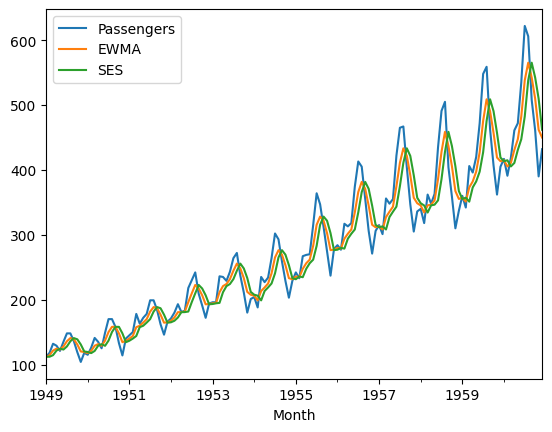

In [26]:
df.plot();


In [27]:
df.head

<bound method NDFrame.head of             Passengers        EWMA         SES
Month                                         
1949-01-01         112  112.000000  112.000000
1949-02-01         118  114.400000  112.000000
1949-03-01         132  121.440000  114.400000
1949-04-01         129  124.464000  121.440000
1949-05-01         121  123.078400  124.464000
...                ...         ...         ...
1960-08-01         606  565.342258  538.237097
1960-09-01         508  542.405355  565.342258
1960-10-01         461  509.843213  542.405355
1960-11-01         390  461.905928  509.843213
1960-12-01         432  449.943557  461.905928

[144 rows x 3 columns]>

In [28]:
df['SES-1'] = df['SES'].shift(-1)

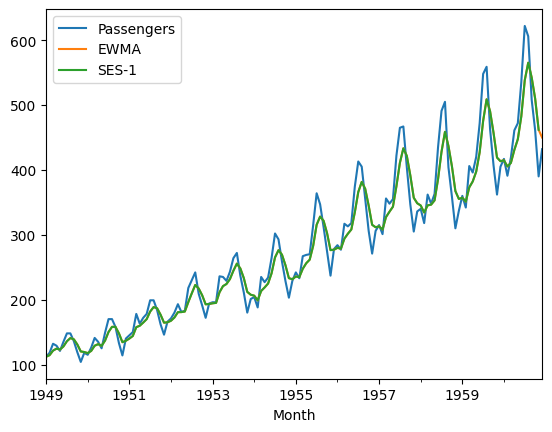

In [29]:
### No!
df[['Passengers', 'EWMA', 'SES-1']].plot();

In [30]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [31]:
ses = SimpleExpSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic')
res = ses.fit()

In [32]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

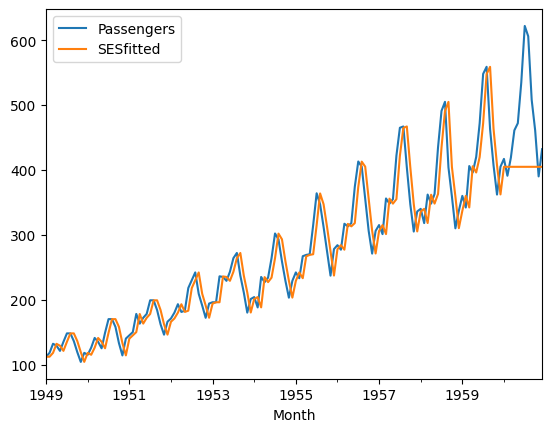

In [33]:
df.loc[train_idx, 'SESfitted'] = res.fittedvalues
df.loc[test_idx, 'SESfitted'] = res.forecast(N_test)
df[['Passengers', 'SESfitted']].plot();

In [34]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

nos damos cuenta que al final de la grafica quedo una linea recta porque no se especificio el alpha y se 

# Holt‚Äôs Linear Trend Model

In [35]:
from statsmodels.tsa.holtwinters import Holt

In [36]:
holt = Holt(
    df['Passengers'],
    initialization_method='legacy-heuristic')

In [37]:
res_h = holt.fit()

In [38]:
df['Holt'] = res_h.fittedvalues

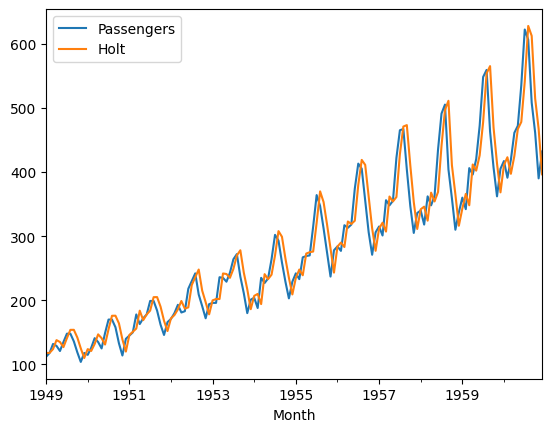

In [39]:
df[['Passengers', 'Holt']].plot();

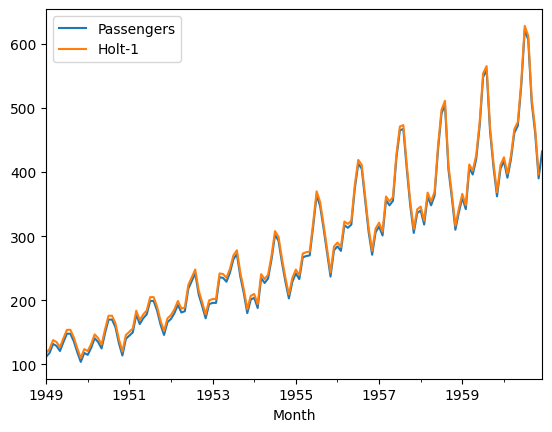

In [40]:
### No! no debemos hacer el shift de la serie para que concuerden perfectamente , mas adelante vamos a ver que necesitamos este shift
df['Holt-1'] = df['Holt'].shift(-1)
df[['Passengers', 'Holt-1']].plot();

In [43]:
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

In [44]:
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)

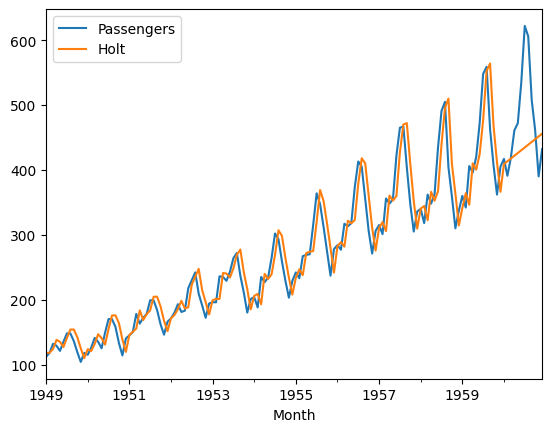

In [45]:
df[['Passengers', 'Holt']].plot();

## Holt-Winters Seasonal Model

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [52]:
hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12)
res_hw = hw.fit()

In [53]:
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues

In [54]:
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

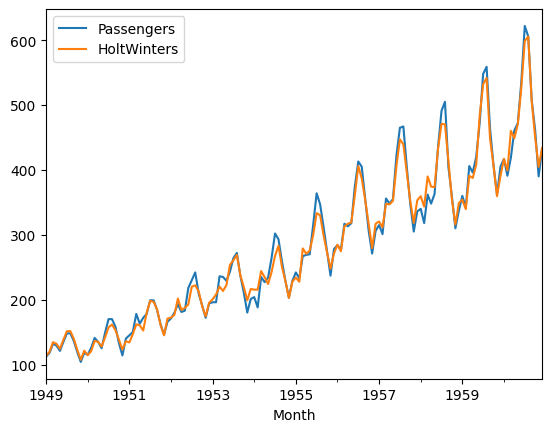

In [55]:
df[['Passengers', 'HoltWinters']].plot();

In [56]:
def rmse(y, t):
  return np.sqrt(np.mean((y - t)**2))

In [57]:
def mae(y, t):
  return np.mean(np.abs(y - t))

In [58]:
print("Train RMSE:", rmse(train['Passengers'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 11.852990975608384
Test RMSE: 15.543111574921017


In [59]:
print("Train MAE:", mae(train['Passengers'], res_hw.fittedvalues))
print("Test MAE:", mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 8.892129241474121
Test MAE: 10.438273613134896


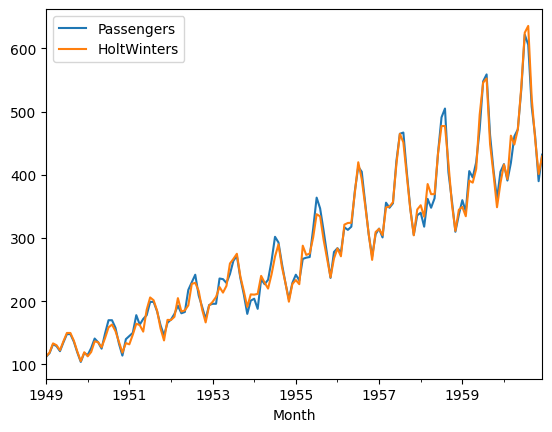

In [60]:
hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot();

In [61]:
print("Train RMSE:", rmse(train['Passengers'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 10.153934838980446
Test RMSE: 16.53521274372282


In [62]:
print("Train MAE:", mae(train['Passengers'], res_hw.fittedvalues))
print("Test MAE:", mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 7.5520526448052845
Test MAE: 10.68334156323617


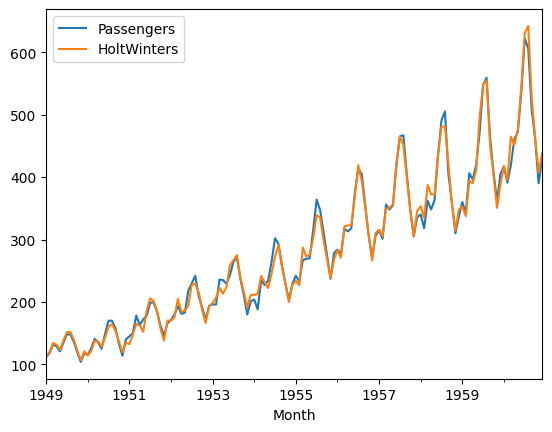

In [63]:
hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot();

In [64]:
print("Train RMSE:", rmse(train['Passengers'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 9.887178133859093
Test RMSE: 19.102093666490106


In [65]:
print("Train MAE:", mae(train['Passengers'], res_hw.fittedvalues))
print("Test MAE:", mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 7.408706879667877
Test MAE: 13.450514902523045
